In [1]:
# Groundtruth file

# Notebook used to generate the ground truth according to the position of prisms in post-process.

In [1]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [18]:
ttfu = importlib.reload(ttfu)
path = "./data/prediction/TS/20220314/"
prefix = "GP-10-20"
P1 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

In [19]:
P = np.array([[ 3.16757534, -0.42103498, -0.12806262,  1.        ],
            [ 3.89296346e+00,  1.96285659e-03, -4.14797074e-01,  1.00000000e+00],
            [ 2.89566976,  0.28583646, -0.46077129,  1.        ]]).T
G1 = np.array([ 2.85818819, -0.25079912, -0.77501231,  1.        ]).T
G2 = np.array([ 3.63328716, -0.20827459, -0.67323631,  1.        ]).T
G3 = np.array([ 3.49290871,  0.28817526, -0.64702379,  1.        ]).T

In [20]:
# Doing a minimization between these not moving points, and the 3D prism coordinates
# Pose_lidar is a list of each rigid transform founded
list_gps_time = []
Pose_G1 = []
Pose_G2 = []
Pose_G3 = []
Prism_corrected = []
number = len(P1)
for i in range(0,number):
    Q = np.array([P1[i,1:4], P2[i,1:4], P3[i,1:4]]).T
    Q =np.concatenate((Q, np.array([[1,1,1]])), axis=0)
    T = ttfu.point_to_point_minimization(P, Q)
    Pose_G1.append(T@G1)
    Pose_G2.append(T@G2)
    Pose_G3.append(T@G3)
    prism_correct = T@P
    Prism_corrected.append(prism_correct)
    list_gps_time.append(P1[i,0])

In [21]:
Pose_G1_arr = np.array(Pose_G1)
Pose_G2_arr = np.array(Pose_G2)
Pose_G3_arr = np.array(Pose_G3)
Prism_corrected_arr = np.array(Prism_corrected)
print(Pose_G1_arr[:])
print(Prism_corrected[0][:,0])

[[17.97436289 21.89224584  0.3493137   1.        ]
 [17.97513371 21.89241894  0.34945442  1.        ]
 [17.97540912 21.89236055  0.34952076  1.        ]
 ...
 [ 5.41595217  6.52580003  0.35838782  1.        ]
 [ 5.41593738  6.52579051  0.35838825  1.        ]
 [ 5.41586713  6.52576733  0.35837589  1.        ]]
[17.61312153 22.03286357  0.9761916   1.        ]


<IPython.core.display.Javascript object>


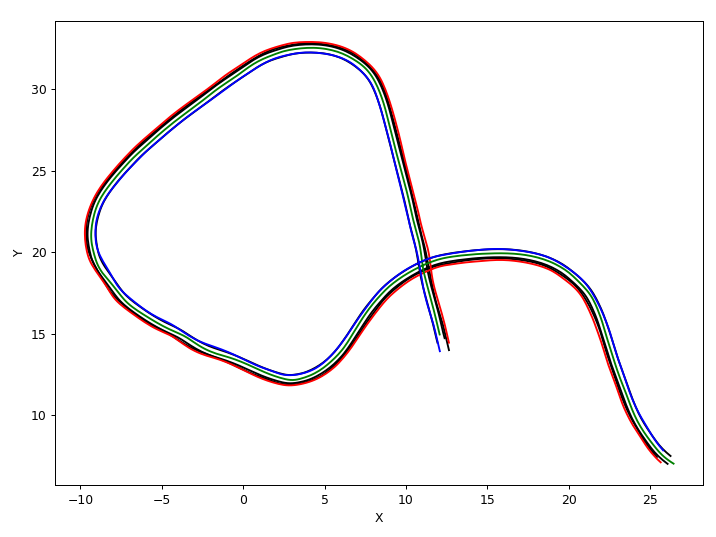

In [26]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
begin = 1000
end = 1500
ax.plot(Pose_G1_arr[begin:end,0],Pose_G1_arr[begin:end,1], color='black')
ax.plot(Pose_G2_arr[begin:end,0],Pose_G2_arr[begin:end,1], color='black')
ax.plot(Pose_G3_arr[begin:end,0],Pose_G3_arr[begin:end,1], color='black')
ax.plot(Prism_corrected_arr[begin:end,0,0],Prism_corrected_arr[begin:end,1,0], color='red')
ax.plot(Prism_corrected_arr[begin:end,0,1],Prism_corrected_arr[begin:end,1,1], color='green')
ax.plot(Prism_corrected_arr[begin:end,0,2],Prism_corrected_arr[begin:end,1,2], color='blue')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
fig.tight_layout() 

<IPython.core.display.Javascript object>


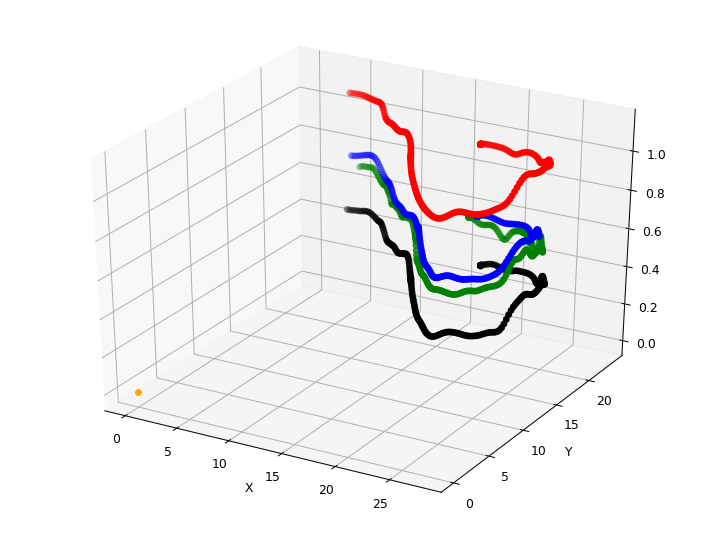

In [23]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(Pose_G1_arr[0:400,0],Pose_G1_arr[0:400,1],Pose_G1_arr[0:400,2], color='black')
ax.scatter3D(Prism_corrected_arr[0:400,0,0],Prism_corrected_arr[0:400,1,0],Prism_corrected_arr[0:400,2,0], color='red')
ax.scatter3D(Prism_corrected_arr[0:400,0,1],Prism_corrected_arr[0:400,1,1],Prism_corrected_arr[0:400,2,1], color='green')
ax.scatter3D(Prism_corrected_arr[0:400,0,2],Prism_corrected_arr[0:400,1,2],Prism_corrected_arr[0:400,2,2], color='blue')
ax.scatter3D(0,0,0, color='orange')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout()

In [24]:
ttfu = importlib.reload(ttfu)
output = "./data/groundtruth/20220314/"
ttfu.grountruth_GP_gps_convert_for_eval(list_gps_time, Pose_G1, output+"theo_gps_front.txt")
ttfu.grountruth_GP_gps_convert_for_eval(list_gps_time, Pose_G2, output+"theo_gps_back.txt")
ttfu.grountruth_GP_gps_convert_for_eval(list_gps_time, Pose_G3, output+"theo_gps_middle.txt")

Conversion done !
Conversion done !
Conversion done !
